In [1]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm
from sys import maxsize
import traceback
%matplotlib inline

In [193]:
# 2 clusters
# not that both covariance matrices are diagonal
mu1 = [0, 5]
sig1 = [ [2, 0], [0, 3] ]

mu2 = [5, 0]
sig2 = [ [4, 0], [0, 1] ]

In [111]:
# generate samples
x1, y1 = np.random.multivariate_normal(mu1, sig1, 100).T
x2, y2 = np.random.multivariate_normal(mu2, sig2, 100).T

xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))
labels = ([1] * 100) + ([2] * 100)

data = {'x': xs, 'y': ys, 'label': labels}
df = pd.DataFrame(data=data)

In [121]:
%pwd

'/opt/notebooks/CS 6220/Assignments'

In [125]:
df

,label,x,y
0,1,-1.351418,3.556612
1,1,2.433054,3.737972
2,1,1.165062,3.390276
3,1,-1.428159,3.461637
4,1,-2.010081,5.528829
5,1,-1.004220,4.852154
6,1,-1.242410,7.032933
7,1,-3.168186,3.494985
8,1,0.201668,4.973526
9,1,0.361643,4.655201


In [2]:
df = pd.read_csv('data/3gaussian.txt', delimiter = ' ', names = ['x', 'y'])

[]

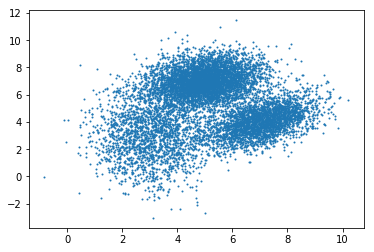

In [3]:
# inspect the data
df.head()
df.tail()

fig = plt.figure()
plt.scatter(df['x'], df['y'], 1)
plt.plot()



In [31]:
### Expectation-maximization

# initial guesses - intentionally bad
guess = { 'mu1': [1,1, None],
          'sig1': [ [1, 0], [0, 1], None ],
          
          'mu2': [4,4, None],
          'sig2': [ [1, 0], [0, 1], None ],
         
          'mu3': [1,2, None],
          'sig3': [ [1, 1], [1, 1], None ],
          
          'lambda': [0.4, 0.2, 0.4]
        }

# probability that a point came from a Guassian with given parameters
# note that the covariance must be diagonal for this to work
def prob(val, mu, sig, lam):
    p = lam
    for i in range(len(val)):
        p *= norm.pdf(val[i], mu[i], sig[i][i])
    return p



In [19]:
np.argmax([4, 9, 3])

1

In [20]:
# assign every data point to its most likely cluster
def expectation(dataFrame, parameters):
    
    for i in range(dataFrame.shape[0]):
        x = dataFrame['x'][i]
        y = dataFrame['y'][i]

        prob_list = [prob([x, y], list(parameters['mu1']), list(parameters['sig1']), parameters['lambda'][0] ),
                     prob([x, y], list(parameters['mu2']), list(parameters['sig2']), parameters['lambda'][1] ),
                     prob([x, y], list(parameters['mu3']), list(parameters['sig3']), parameters['lambda'][2] )]


        dataFrame['label'][i] = np.argmax(prob_list)
    
    return dataFrame



In [21]:
# update estimates of lambda, mu and sigma
def maximization(dataFrame, parameters):
    points_assigned_to_cluster1 = dataFrame[dataFrame['label'] == 1]
    points_assigned_to_cluster2 = dataFrame[dataFrame['label'] == 2]
    percent_assigned_to_cluster1 = len(points_assigned_to_cluster1) / float(len(dataFrame))
    percent_assigned_to_cluster2 = 1 - percent_assigned_to_cluster1
    parameters['lambda'] = [percent_assigned_to_cluster1, percent_assigned_to_cluster2 ]
    parameters['mu1'] = [points_assigned_to_cluster1['x'].mean(), points_assigned_to_cluster1['y'].mean()]
    parameters['mu2'] = [points_assigned_to_cluster2['x'].mean(), points_assigned_to_cluster2['y'].mean()]
    parameters['sig1'] = [ [points_assigned_to_cluster1['x'].std(), 0 ], [ 0, points_assigned_to_cluster1['y'].std() ] ]
    parameters['sig2'] = [ [points_assigned_to_cluster2['x'].std(), 0 ], [ 0, points_assigned_to_cluster2['y'].std() ] ]
    return parameters



In [37]:
def maximization(df, parameters):

    percent_cluster = {}
    points_assigned = {}
    mu    = {}
    sigma = {}
    
    for i in range(1,4): 
        
        points_assigned[i] = df[df['label'] == i]
        parameters['mu' + str(i)]   = [[points_assigned[i]['x'].mean(), 0], [0, points_assigned[i]['y'].mean()], None]
        parameters['sig' + str(i)]  = [[points_assigned[i]['x'].std(), 0], [0, points_assigned[i]['y'].std()], None]
    
    parameters['lambda'] = [(len(points_assigned[i])/len(df)) for i in range(1,4)]
    
    return parameters

In [71]:
# get the distance between points
# used for determining if params have converged
def distance(old_params, new_params):
    
    dist = 0
    
    for param in ['mu1', 'mu2', 'mu3']:
        for i in range(len(old_params)):
            try: 
                if (old_params[param][i] == old_params[param][i]): dist += (old_params[param][i] - new_params[param][i]) ** 2
                print ('distance: ' + str(dist))
            except Exception as e: 
                traceback.print_exc()
                continue
                
    if dist != dist: 
        
        print (old_params)
        print ('\n' + '_' * 100)
        print (new_params)
    
    return dist ** 0.5

In [72]:
# loop until parameters converge
shift = maxsize
epsilon = 0.01
iters = 0
df_copy = df.copy()
# randomly assign points to their initial clusters
df_copy['label'] = map(lambda x: x+1, np.random.choice(3, len(df)))
params = pd.DataFrame(guess)

while shift > epsilon:
    iters += 1
    # E-step
    updated_labels = expectation(df_copy.copy(), params)

    # M-step
    updated_parameters = maximization(updated_labels, params.copy())

    # see if our estimates of mu have changed
    # could incorporate all params, or overall log-likelihood
    shift = distance(params, updated_parameters)

    # logging
    print("iteration {}, shift {}".format(iters, shift))

    # update labels and params for the next iteration
    df_copy = updated_labels
    params = updated_parameters

    fig = plt.figure()
    plt.scatter(df_copy['x'], df_copy['y'], 24, c=df_copy['label'])
    fig.savefig("iteration{}.png".format(iters))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


   lambda                      mu1  mu2  mu3                     sig1    sig2  \
0     0.4   [5.469039639856885, 0]  4.0  1.0  [1.5414284318037563, 0]  [1, 0]   
1     0.2  [0, 5.6425174759928485]  4.0  2.0  [0, 1.8221485086218998]  [0, 1]   
2     0.4                     None  NaN  NaN                     None    None   

     sig3  
0  [1, 1]  
1  [1, 1]  
2    None  
   lambda                      mu1                      mu2  mu3  \
0     0.4   [5.469039639856885, 0]  [2.1205444712273045, 0]  1.0   
1     0.2  [0, 5.6425174759928485]   [0, 2.670901639831513]  2.0   
2     0.4                     None                     None  NaN   

                      sig1                     sig2    sig3  
0  [1.5414284318037563, 0]  [0.7123825546230035, 0]  [1, 1]  
1  [0, 1.8221485086218998]  [0, 0.8226337065177196]  [1, 1]  
2                     None                     None    None  
   lambda                      mu1                      mu2       mu3  \
0     0.4   [5.469039639856885, 0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
params

,lambda,mu1,mu2,mu3,sig1,sig2,sig3
0,0.1138,"[3.6487678779730732, 0]","[5.585362433710881, 0]","[nan, 0]","[0.7536971253432784, 0]","[1.5571465566974934, 0]","[nan, 0]"
1,0.8408,"[0, 4.435879478976067]","[0, 5.622279307298997]","[0, nan]","[0, 0.8851367411470044]","[0, 2.029203883221482]","[0, nan]"
2,0.0000,None,None,None,None,None,None


In [28]:
(old_params[param][i] - new_params[param][i])

NameError: name 'old_params' is not defined

In [51]:
new_params

,lambda,mu1,mu2,mu3,sig1,sig2,sig3
0,0.4,1.0,4.0,1.0,"[1, 0]","[1, 0]","[1, 1]"
1,0.2,1.0,4.0,2.0,"[0, 1]","[0, 1]","[1, 1]"
2,0.4,NaN,NaN,NaN,None,None,None


In [54]:
dist = 0
for param in ['mu1', 'mu2', 'mu3']:
    for i in range(len(old_params)):
        print(param)
        print(old_params[param][i])
        print(new_params[param][i])
        if (old_params[param][i] == old_params[param][i]): dist += (old_params[param][i] - new_params[param][i]) ** 2
        

mu1
1.0
1.0
mu1
1.0
1.0
mu1
nan
nan
mu2
4.0
4.0
mu2
4.0
4.0
mu2
nan
nan
mu3
1.0
1.0
mu3
2.0
2.0
mu3
nan
nan


In [61]:
dist

0.0